<h1> 15 - Le format Netcdf:</h1> 


Le format Netcdf (de l'anglais Network Common Data Form) est un moyen de créer, d'accéder et de partager des données scientifiques dans un format auto-documenté et transparent pour de nombreux types de machines.


------------------------------------
<img src = "./figures/xarray.png" alt = "xarray" width = "80%" height = "80%">

------------------------------------

Le fichier Netcdf lui-même contient des informations décrivant les données qu'il contient.

Un fichier NetCDF a des dimensions, des variables et des attributs. Voici un petit exemple de fichier NetCDF, pour illustrer ces concepts de dimensions, variables et attributs.



La notation utilisée pour décrire ce fichier NetCDF est appelée Network Common Data Language (CDL). Il donne une version "texte" qui permet de comprendre facilement la structure et le contenu d'un fichier binaire NetCDF:

    netcdf ./data/NARR_tasmax_201701.nc {
      dimensions:
    x = 349;
    y = 277;
    time = 31;
      variables:
    float lon(y=277, x=349);
      :units = "degrees_east";
      :long_name = "Longitude";
      :CoordinateAxisType = "Lon";

    float lat(y=277, x=349);
      :units = "degrees_north";
      :long_name = "Latitude";
      :CoordinateAxisType = "Lat";

    double time(time=31);
      :long_name = "Time";
      :delta_t = "";

    float tasmax(time=31, y=277, x=349);
      :long_name = "Daily maximum temperature";
      :units = "Celcius";
      :missing_value = -999.0; // double
      :coordinates = "lon lat";
}


- <a href="https://www.giss.nasa.gov/tools/panoply/download/">Panoply</a> est un logiciel open source utilisé pour lire rapidement et visualiser un fichier Netcdf:

- Le module python que nous utiliserons dans cette section est <a href="https://pypi.org/project/netCDF4/">netCDF4</a>.


Pour installer le module sous Anaconda: <b>conda install -c anaconda netcdf4</b>  


<img src="./figures/CanESM2_rcp85_r1i1p1_global_tos.jpg" alt="Seaborn" width="60%" height="70%">


<h2> 15.1- Créer un fichier Netcdf:</h2> 

In [7]:
from netCDF4 import Dataset
import os 
import warnings
warnings.filterwarnings("ignore")

file_name = "./DATA/2D_Temperature.nc"
if os.path.isfile(file_name):
    os.remove(file_name)
    
# Ouverture du fichier pour écriture, on peut spécifier le format="NETCDF4_CLASSIC" ou "NETCDF3_CLASSIC"
# par défault on aura NETCDF4

ds = Dataset(file_name, mode="w")

- Netcdf4-python: <b>createDimension</b>

Nous allons créer un champs 2D: (20,20)  


In [8]:
ds.createDimension("x", 20)
ds.createDimension("y", 20)
ds.createDimension("time", None)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0

- Netcdf4-python: <b>createVariable</b>

Nous allons créer deux variables : var1 et var2 et définir leurs dimensions. 

In [9]:
var1 = ds.createVariable("field1", "f4", ("time", "x", "y"))
var2 = ds.createVariable("field2", "f4", ("time", "x", "y"))

#add netcdf attributes
var1.units = "Celcius"
var1.long_name = "Surface air temperature"

var2.units = "Kelvin"
var2.long_name = "Surface air temperature"


Nous pouvons maintenant assigner notre champs ou variable. 
Dans notre exemple on va générer des données aléatoires et indiquer au programme où il doit les assigner. 

In [10]:
import numpy as np
data = np.random.randn(10, 20, 20)
var1[:] = data
var2[:] =  data + 273.15
ds.close();

Voilà, notre fichier est écrit sur notre disque. 

<h2> 15.2- Lire un fichier Netcdf:</h2> 

Nous allons lire le fichier Netcdf4 que nous avons créer dans la section précédente. 


In [11]:
from netCDF4 import Dataset
ds = Dataset("./DATA/2D_Temperature.nc")

Nous allons sélectionner les variables d'intérêt: aucune donnée n'est chargée à ce stade. 

Pour connaitre quelles sont les variables présentes dans notre fichier Netcdf: 


In [13]:
print(ds.variables.keys())

print(ds.variables["field1"].dimensions, ds.variables["field1"].shape)

odict_keys(['field1', 'field2'])
('time', 'x', 'y') (10, 20, 20)


Nous allons lire les données, à ce stade, les données sont chargées en mémoire. 

In [18]:
data1_var = ds.variables["field1"]
all_data = data1_var[:]
print(all_data.shape)

(10, 20, 20)


On va par exemple aller chercher le premier pas de temps:

In [31]:
data_step1 = data1_var[1,:,:]
print(data_step1.shape, data_step1.shape, data_step1.mean())

(20, 20) (20, 20) -0.022204468


<h2> 15.3- Manipuler un fichier Netcdf:</h2> 

Dans cet exemple, nous travaillerons avec des données de températures maximales quotidiennes pour tous les mois de janvier de 1971 à 2000 à partir du modèle régional CRCM5 développé au centre ESCER.

Nous allons importer notre propre module de calcul des indices de température, ce module est appelé Indices_Température. 

Dans un premier temps, nous importons les bibliothèques nécessaires.


In [58]:
from netCDF4 import Dataset
import Indices_Temperature
import numpy as np

- Ouvrons le premier fichier Ne
tcdf 'CRCM5-v1_NAM-44_ll_CCCma-CanESM2_historical_tasmax_197101.nc':

In [52]:
nc_Modc=Dataset('./DATA/CRCM5/CRCM5-v1_NAM-44_ll_CCCma-CanESM2_historical_tasmax_197101.nc','r')
lats=nc_Modc.variables['lat'][:]
lons=nc_Modc.variables['lon'][:]
varc=nc_Modc.variables[variable][:]

- Rapide vue d'ensemble de notre fichier: 

In [53]:
nc_Modc.variables

OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(y, x)
                  standard_name: longitude
                  long_name: Longitude
                  units: degrees_east
                  _CoordinateAxisType: Lon
              unlimited dimensions: 
              current shape = (130, 155)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(y, x)
                  standard_name: latitude
                  long_name: Latitude
                  units: degrees_north
                  _CoordinateAxisType: Lat
              unlimited dimensions: 
              current shape = (130, 155)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  standard_name: time
                  long_name: time
                  bounds

In [54]:
print('-----------------------------------------')
print('Temperature dimension = ',varc.shape)
print('Minimum of temperature = ', np.nanmin(varc))
print('Maximum of temperature = ', np.nanmax(varc))
print('-----------------------------------------')
print('-----------------------------------------')
print('Latitude dimension= ',lats.shape)
print('Minimum of latitude = ', np.min(lats))
print('Maximum of latitude = ', np.max(lats))
print('-----------------------------------------')
print('-----------------------------------------')
print('Longitude dimesion = ',lons.shape)
print('Minimum of longitude = ', np.min(lons))
print('Maximum of longitude = ', np.max(lons))
print('-----------------------------------------')

-----------------------------------------
Temperature dimension =  (31, 130, 155)
Minimum of temperature =  -57.66677
Maximum of temperature =  30.657953
-----------------------------------------
-----------------------------------------
Latitude dimension=  (130, 155)
Minimum of latitude =  12.538727
Maximum of latitude =  75.86
-----------------------------------------
-----------------------------------------
Longitude dimesion =  (130, 155)
Minimum of longitude =  -170.71053
Maximum of longitude =  -23.28948
-----------------------------------------


Nous allons appliquer la fonction Tmax90p() du module Indices_Temperature que nous avons importer. 

In [60]:
help(Indices_Temperature)

Help on module Indices_Temperature:

NAME
    Indices_Temperature - Created on Mon Feb  5 13:56:30 2018

DESCRIPTION
    @author: guillaume

FUNCTIONS
    MOY(S)
    
    Tmax90p(S)
    
    Tmin10p(S)

FILE
    d:\utilisateurs\guillaume\documents\github\formation_python\15_netcdf\indices_temperature.py




In [72]:
varc.shape[-2:]

(130, 155)

In [74]:
###### boucle sur tous les points de grille et calcul de l'indice
###### Nous allons stocker le résultat dans la matrice IND de tailler 

IND = np.zeros(varc.shape[-2:],dtype=float)

for ni in range(0, varc.shape[-2:][0]):
    for nj in range(0, varc.shape[-2:][1]):
        IND[ni,nj]=Indices_Temperature.Tmax90p(varc[:,ni,nj])
        description='Monthly Mean of Tmax90p' 
        unite='°Celcius' 

In [79]:
IND
print(IND.shape)

(130, 155)


Nous pouvons faire maintenant le même exercice mais sur l'ensemble des années de 1971 à 2000 pour le mois de Janvier.

In [80]:
Mois='01'
indice = 'Tmax90p'
path_model='CRCM5-v1_CCCma-CanESM2_historical'
variable='tasmax'
rep_data='./DATA/CRCM5/'
model='CRCM5-v1_NAM-44_ll_CCCma-CanESM2'
yi = 1971
yf = 2000
tot=(yf-yi)+1 

Notre matrice finale IND aura ainsi 3 dimensions: (time, lat, lon) telle que: 

In [87]:
IND = np.zeros((tot,varc.shape[-2:][0],varc.shape[-2:][1]),dtype=float)
IND.shape

(30, 130, 155)

In [89]:
nt=0
for year in range(yi,yf+1):
    ###### ouverture et lecture des fichiers Netcdf
    hist=model+'_historical_'+variable+'_'+str(year)+Mois+'.nc'     
    modelc=rep_data+'/'+hist
    nc_Modc=Dataset(modelc,'r')
    lats=nc_Modc.variables['lat'][:]
    lons=nc_Modc.variables['lon'][:]
    varc=nc_Modc.variables[variable][:]
    
    ###### boucle sur tous les points de grille et calcul de l'indice
    for ni in range(0, varc.shape[-2:][0]):
        for nj in range(0, varc.shape[-2:][1]):
            IND[nt,ni,nj]=Indices_Temperature.Tmax90p(varc[:,ni,nj])
            description='Monthly Mean of Tmax90p' 
            unite='°Celcius'      
            
    nt+=1 # incrément sur les années
    
    ###### Écriture du fichier Netcdf en sortie
C = Dataset(rep_out+model+'_historical_'+indice+'_'+str(yi)+'-'+str(yf)+'_'+Mois+'.nc', 'w')
C.description = 'Indice temperature'
C.conventions = 'CF-1.0'  
C.model_id = model
C.grid='latlon'
C.CDO = 'Climate Data Operators version 1.6.2 (http://code.zmaw.de/projects/cdo)'
C.institution = 'UQAM - ESCER Center, University of Quebec in Montreal'
C.contact = 'Guillaume Dueymes'
########################################
# Dimensions
C.createDimension('x', len(varc[0][0]))
C.createDimension('y', len(varc[0]))
C.createDimension('time', tot)

var=C.createVariable(str(indice), np.float32, ('time','y','x')) 
var.long_name = str(description)
var.unit = str(unite)
lat=C.createVariable('lat', np.float32, ('y','x'))
lon=C.createVariable('lon', np.float32, ('y','x')) 

time = C.createVariable('time', np.float64, ('time',))
time.long_name = 'time'

for var in ['lon','lat','time']:
    for att in nc_Modc.variables[var].ncattrs():
        setattr(C.variables[var],att,getattr(nc_Modc.variables[var],att))

time[:]=range(1,nt+1)
lat[:,:] = lats
lon[:,:] = lons
C.variables[str(indice)][:,:,:] = IND[::]
C.close()
    

<h2> 15.4- Extraire un point de grille:</h2> 

<img src="./figures/positions_points_de_grille.png" alt="NARR" width="100%" height="100%">

Dans cet exemple, nous travaillerons avec les données de température quotidienne maximale de la réanalyse régionale (NARR). Pour plus d'informations sur ce produit:

www.emc.ncep.noaa.gov/mmb/rreanl

Les fichiers Netcdf que nous ouvrirons sont des valeurs quotidiennes du 1er janvier 2017 au 31 décembre 2017. Les fichiers sont archivés par mois.

Le point de grille NARR le plus proche de la station météorologique ECCC Montréal / McTavish (45,5 N, -73,8 W) sera extrait ici.

Importons d'abord les bibliothèques nécessaires.



In [103]:
import netCDF4
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

On définit nos paramètres d'entrée. 

In [104]:
rep1='./DATA/NARR/'
model='NARR'
variable='tasmax'
variable_name='Temperature maximale'
yeari=2017
monthi=1
yearf = 2017
monthf = 12
station='Montreal' 
lati = 45.5
loni = -73.8

Nous allons travailler sur une série temporelle quotidienne entre le 1er janvier 2017 et le 31 décembre 2017. On peut définir les dimensions de notre résultat:

In [105]:
day_start=1
day_end = pd.date_range('{}-{}'.format(yearf, monthf), periods=1, freq='M').day.tolist()[0]
start=datetime.datetime(yeari,monthi,day_start)
end=datetime.datetime(yearf,monthf,day_end)
d0 = date(yeari, monthi, day_start)
d1 = date(yearf, monthf, day_end)
delta = d1 - d0
nb_days = delta.days+1
var_data=np.zeros(nb_days)

In [106]:
var_data.shape

(365,)

Nous définissons une fonction qui calculera la distance entre chaque point de grille du fichier Netcdf et notre latitude / longitude de référence. On déduit alors la distance minimale.

In [107]:
def getclosest_ij(lats,lons,latpt,lonpt):
     # find squared distance of every point on grid
     dist_sq = (lats-latpt)**2 + (lons-lonpt)**2 
     # 1D index of minimum dist_sq element
     minindex_flattened = dist_sq.argmin()
     # Get 2D index for latvals and lonvals arrays from 1D index
     return np.unravel_index(minindex_flattened, lats.shape)

La fonction suivante nous permet d'incrémenter nos mois lors de la lecture des fichiers Netcdf.

In [108]:
def add_month(now):
    try:
        then = (now + relativedelta(months=1)).replace(day=now.day)
    except ValueError:
        then = (now + relativedelta(months=2)).replace(day=1)
    return then

Nous pouvons  appliquer notre fonction sur chaque point de la grille, mois par mois et enregistrer la valeur du point de grille sélectionner dans un DataFrame.

In [110]:
i=0
# Début de notre boucle temporelle
incr=start
IND=[]
while incr <= end:
    filename= rep1 + model + '_' + variable + '_' + str(incr.year) + '{:02d}'.format(incr.month) + '.nc'   
    f = netCDF4.Dataset(filename)
    var = f.variables[variable] 
    lat, lon = f.variables['lat'], f.variables['lon']
    # extract lat/lon values (in degrees) to numpy arrays
    latvals = lat[:]; lonvals = lon[:] 
    # a function to find the index of the point closest pt
    # (in squared distance) to give lat/lon value.    
    iy_min, ix_min = getclosest_ij(latvals, lonvals, lati, loni)
    IND.append(var[:,iy_min,ix_min])
    incr=add_month(incr)
    
flattened_list = [y for x in IND for y in x]
start=datetime.datetime(yeari,monthi,day_start)
TIME=[]
for i in range(0,nb_days,1): 
    TIME.append((start+timedelta(days=i)))
    
dataFrame_NARR = pd.DataFrame({'Date': TIME, variable_name: flattened_list}, columns = ['Date',variable_name]) 
dataFrame_NARR = dataFrame_NARR.set_index('Date')   
dataFrame_NARR.head()

,Temperature maximale
Date,
2017-01-01,-0.893957
2017-01-02,-1.531439
2017-01-03,-1.737830
2017-01-04,-0.240698
2017-01-05,-0.791754


In [18]:
from tabulate import tabulate
print(tabulate(dataFrame_NARR.head(), headers='keys', tablefmt='pipe'))

| Date                |   Temperature maximale |
|:--------------------|-----------------------:|
| 2017-01-01 00:00:00 |              -0.893957 |
| 2017-01-02 00:00:00 |              -1.53144  |
| 2017-01-03 00:00:00 |              -1.73783  |
| 2017-01-04 00:00:00 |              -0.240698 |
| 2017-01-05 00:00:00 |              -0.791754 |


Nous pouvons sauvegarder notre résultat au format csv.

In [111]:
dataFrame_NARR.to_csv('./DATA/NARR/NARR_'+station+'_1pt_'+str(variable)+'_'+ '{:02d}'.format(monthi) + str(yeari)+'_'+ '{:02d}'.format(monthf) + str(yearf)+'.csv')    

- Observation vs NARR


Maintenant que nous avons extrait notre grille près de Montréal, nous pouvons comparer ces valeurs avec des observations.

Nous allons extraire les données de la station de Montréal McTavish et les inclure dans le DataFrame précédent. On pourra ainsi aisément comparer nos séries. 

In [112]:
dataframe_station = pd.read_csv('./DATA/station/MONTREAL_TAVISH_tasmax_1948_2017.csv', header=None, names=['Maximum temperature: OBS'])
start = date(1948, 1, 1)
end = date(2017, 12, 31)
delta=(end-start) 
nb_days = delta.days + 1 
rng = pd.date_range(start, periods=nb_days, freq='D')

dataframe_station['datetime'] = rng
dataframe_station.index = dataframe_station['datetime'] 
dataframe_station = dataframe_station.drop(["datetime"], axis=1)

In [113]:
dataframe_station.head()

,Maximum temperature: OBS
datetime,
1948-01-01,-10.0
1948-01-02,-3.9
1948-01-03,-0.6
1948-01-04,-2.8
1948-01-05,-2.2


In [22]:
from tabulate import tabulate
print(tabulate(dataframe_station.head(), headers='keys', tablefmt='pipe'))

| datetime            |   Maximum temperature: OBS |
|:--------------------|---------------------------:|
| 1948-01-01 00:00:00 |                      -10   |
| 1948-01-02 00:00:00 |                       -3.9 |
| 1948-01-03 00:00:00 |                       -0.6 |
| 1948-01-04 00:00:00 |                       -2.8 |
| 1948-01-05 00:00:00 |                       -2.2 |


In [114]:
dataFrame_NARR = dataFrame_NARR.rename(columns={"Temperature maximale": "Maximum temperature: NARR"})
df_NARR_Station = pd.concat([dataframe_station,dataFrame_NARR],axis=1)
df_NARR_Station.tail()

,Maximum temperature: OBS,Maximum temperature: NARR
2017-12-27,-17.6,-18.818960
2017-12-28,-20.5,-19.372122
2017-12-29,-18.4,-16.453222
2017-12-30,-17.3,-16.208838
2017-12-31,-18.3,-16.772772


In [24]:
from tabulate import tabulate
print(tabulate(df_NARR_Station.tail(), headers='keys', tablefmt='pipe'))

|                     |   Maximum temperature: OBS |   Maximum temperature: NARR |
|:--------------------|---------------------------:|----------------------------:|
| 2017-12-27 00:00:00 |                      -17.6 |                    -18.819  |
| 2017-12-28 00:00:00 |                      -20.5 |                    -19.3721 |
| 2017-12-29 00:00:00 |                      -18.4 |                    -16.4532 |
| 2017-12-30 00:00:00 |                      -17.3 |                    -16.2088 |
| 2017-12-31 00:00:00 |                      -18.3 |                    -16.7728 |


Traçons les années 2016 et 2017 en appliquant la librairie Matplotlib sur le DataFrame . 

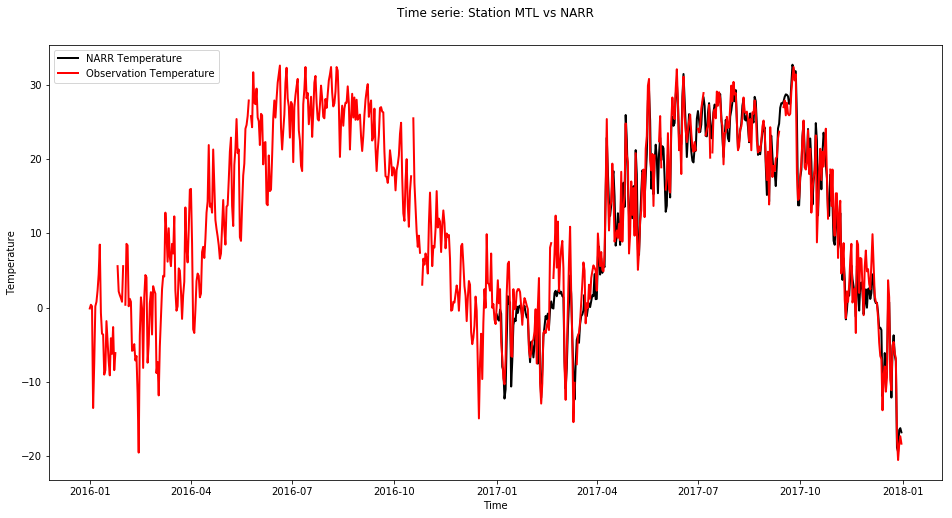

In [117]:
import matplotlib.pyplot as plt
df=df_NARR_Station.loc['2016' : '2017']
color = ['black', 'red']
fig = plt.figure(figsize=(16,8))
plt.plot(df.index, df['Maximum temperature: NARR'][:],  label='NARR Temperature', linewidth=2, c=color[0])
plt.plot(df.index, df['Maximum temperature: OBS'][:],  label='Observation Temperature', linewidth=2, c=color[1])

# Autre méthode pour tracer avec Pandas
#df_NARR_Station['2017'].plot(figsize=(10,5))

plt.xlabel("Time")
plt.ylabel("Temperature", {'color': 'black', 'fontsize': 10})
plt.title("Time serie: Station MTL vs NARR", y=1.05)
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(0, 1, 1, 0),fontsize =10)
plt.savefig("figures/NARR_time_Serie_temperature.png", dpi=300, bbox_inches='tight')   # bbox_inches= : option qui permet de propostionner le graphique lors de l'enregistrement
plt.show()


- appliquons la fonction <b> .rolling () </ b> pour calculer une moyenne mobile sur notre signal

In [118]:
import matplotlib.pyplot as plt
df_NARR_Station['rollingmean5 Station']=  df_NARR_Station['Maximum temperature: OBS'].rolling(window=5).mean()
df_NARR_Station['rollingmean5 NARR']=  df_NARR_Station['Maximum temperature: NARR'].rolling(window=5).mean()
df_NARR_Station.tail()

,Maximum temperature: OBS,Maximum temperature: NARR,rollingmean5 Station,rollingmean5 NARR
2017-12-27,-17.6,-18.818960,-8.04,-8.318930
2017-12-28,-20.5,-19.372122,-11.12,-11.099524
2017-12-29,-18.4,-16.453222,-13.88,-13.647839
2017-12-30,-17.3,-16.208838,-16.12,-15.613794
2017-12-31,-18.3,-16.772772,-18.42,-17.525183


In [28]:
from tabulate import tabulate
print(tabulate(df_NARR_Station.tail(), headers='keys', tablefmt='pipe'))

|                     |   Maximum temperature: OBS |   Maximum temperature: NARR |   rollingmean5 Station |   rollingmean5 NARR |
|:--------------------|---------------------------:|----------------------------:|-----------------------:|--------------------:|
| 2017-12-27 00:00:00 |                      -17.6 |                    -18.819  |                  -8.04 |            -8.31893 |
| 2017-12-28 00:00:00 |                      -20.5 |                    -19.3721 |                 -11.12 |           -11.0995  |
| 2017-12-29 00:00:00 |                      -18.4 |                    -16.4532 |                 -13.88 |           -13.6478  |
| 2017-12-30 00:00:00 |                      -17.3 |                    -16.2088 |                 -16.12 |           -15.6138  |
| 2017-12-31 00:00:00 |                      -18.3 |                    -16.7728 |                 -18.42 |           -17.5252  |


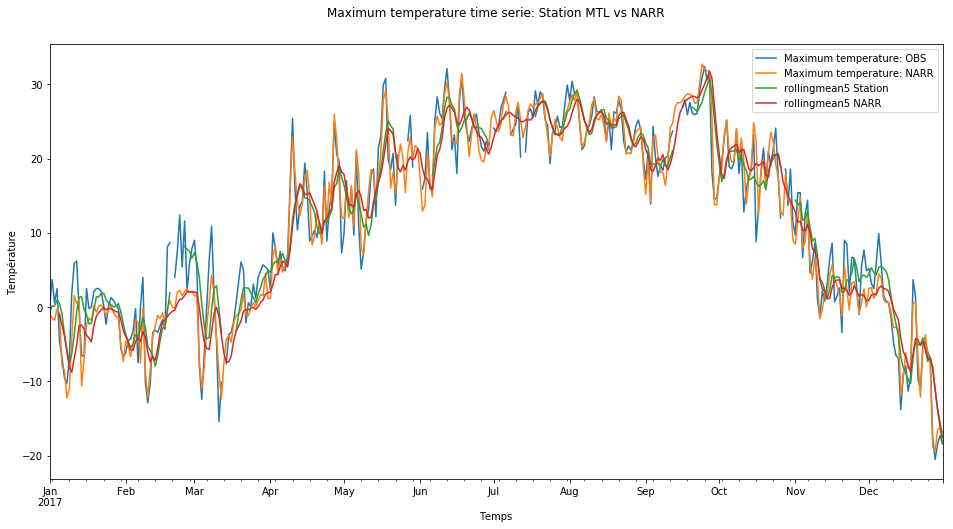

In [119]:
df_NARR_Station['2017-01':'2017-12'].plot(figsize=(16,8))
plt.xlabel("Temps")
plt.ylabel("Température")
plt.title("Maximum temperature time serie: Station MTL vs NARR", y=1.05)
plt.savefig("figures/NARR_time_Serie_temperature2.png", dpi=300, bbox_inches='tight')   # bbox_inches= : option qui permet de propostionner le graphique lors de l'enregistrement
plt.show()

<h2> 15.5- Extraire un domaine délimité par une boite 2D:</h2> 

<img src="./figures/CORDEX_domaine.png" alt="NARR" width="50%" height="60%">


Au lieu d'extraire un point de grille, on peut vouloir extraire un domaine / box délimité par des latitudes et des longitudes.

Dans cet exemple, nous travaillerons avec la moyenne annuelle des données de températures maximales quotidiennes de plusieurs modèles régionaux de CORDEX-NAM44.

Nous allons extraire tous les points de grille de la région entre 

    - 47degN et 51degN de latitude 
    - -72degW et -64degW de longitude.

Nous tracerons ensuite la variabilité interannuelle des anomalies moyennes annuelles de température.

<h3> - Travail sur un fichier Netcdf</h3>


In [129]:

import netCDF4
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
import warnings; warnings.filterwarnings(action='ignore')
import seaborn as sns
from matplotlib import gridspec
import matplotlib as mpl

rep='./DATA/Inter_annual_anomaly/'

# Region à extraire 
latbounds = [ 47 , 51 ]
lonbounds = [ -72 , -64 ] 

# Lecture du fichier Netcdf
filename= rep +'anomalie_CRCM5-v1_NAM-44_ll_CCCma-CanESM2_rcp45_Mean_tasmax_2011-2040_1971-2000.nc'   
nc = netCDF4.Dataset(filename)

# Lecture des variables
var = nc.variables['Mean_tasmax'][:]  
lats = nc.variables['lat'][:]; lons = nc.variables['lon'][:]

# Extraction du sous-domaine 
subset = ((lats > latbounds[0]) & (lats < latbounds[1]) & 
        (lons > lonbounds[0]) & (lons < lonbounds[1]))

data=pd.DataFrame(var[:,subset], dtype='float') 
        

In [154]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,1.477689,1.457037,1.581675,1.502043,1.512367,1.435976,1.451433,1.586266,1.577248,1.527665,...,1.893243,1.836880,1.716371,1.633053,1.621840,2.184239,2.217251,2.116752,2.056826,2.168939
1,0.809766,0.822760,0.837009,0.830208,0.879807,0.874870,0.808254,0.928231,0.892883,0.937235,...,2.078122,2.018263,1.847656,1.770287,1.723371,2.283811,2.412838,2.383081,2.181507,2.310836
2,0.123789,0.068485,0.160753,0.161486,0.227988,0.263271,0.237639,0.184735,0.249564,0.232046,...,1.195626,1.082461,0.926054,0.945262,0.908978,1.321545,1.230734,1.172349,1.053613,1.175336
3,0.446947,0.419797,0.525159,0.467538,0.557181,0.430283,0.459588,0.499041,0.501688,0.558993,...,0.184572,0.199441,0.421587,0.536298,0.436308,0.182898,0.186108,0.120251,0.140952,0.006168
4,1.083132,1.143277,1.122769,1.168139,1.212790,1.286812,1.313845,1.080200,1.208669,1.277381,...,1.212881,1.081511,0.897174,0.755252,0.856003,1.263626,1.261042,1.326922,1.264701,1.376395


<h3> - Travail sur un ensemble de modèles</h3>

On va effectuer le même exercice mais en bouclant sur deux simulations RCP45 et deux périodes de temps. 
Pour chaque année et chaque simulation, nous allons calculer la moyenne spatiale sur l'ensemble du domaine . 

In [156]:
# path and variable name
rep='./DATA/Inter_annual_anomaly/'
variable_in = 'Mean_tasmax'

# list of periods we want to use
list_period = ['2011-2040','2041-2070','2071-2100']

# list of models
list_rcp45 = ['CRCM5-v1_NAM-44_ll_CCCma-CanESM2_rcp45', 'CRCM5-v1_NAM-44_ll_MPI-M-MPI-ESM-LR_rcp45' ]

# Area to extract
latbounds = [ 47 , 51 ]
lonbounds = [ -72 , -64 ] 

# 
df_rcp45 = []
matrix_45 = []
for period in list_period: 
    globals()['flattened_list_'+period] = []  # we define a global variable 
    for i in range(0,len(list_rcp45)):
        filename= rep +'anomalie_' +  list_rcp45[i] +  '_' + variable_in + '_' + period  + '_1971-2000.nc'   
        nc = netCDF4.Dataset(filename)
        # we here read netcdf values
        var = nc.variables[variable_in][:]  
        lats = nc.variables['lat'][:]; lons = nc.variables['lon'][:]
        # in this part, we extract our domain 
        subset = ((lats > latbounds[0]) & (lats < latbounds[1]) & 
             (lons > lonbounds[0]) & (lons < lonbounds[1]))
        data=pd.DataFrame(var[:,subset], dtype='float') 
        globals()['flattened_list_'+period].append(data.mean(axis=1))
        
    df_rcp45.append(pd.DataFrame(globals()['flattened_list_'+period]).T) 
    
df_rcp45 = pd.concat(df_rcp45)
df_rcp45.head()


,0,1
0,1.720843,-0.288691
1,1.476198,0.885357
2,0.581686,0.541863
3,0.390671,-0.014199
4,1.148421,1.294169


On peut ajouter un index de type datetime: 

In [157]:
TIME=[]
for y in range(int(list_period[0].split('-')[0]),int(list_period[-1].split('-')[-1])+1,1):
    TIME.append(datetime.strptime(str(y), '%Y'))
    
df_rcp45['Date'] = TIME   
df_rcp45.index = df_rcp45['Date']
df_rcp45 = df_rcp45.drop(["Date"], axis=1) 
df_rcp45.head()

,0,1
Date,,
2011-01-01,1.720843,-0.288691
2012-01-01,1.476198,0.885357
2013-01-01,0.581686,0.541863
2014-01-01,0.390671,-0.014199
2015-01-01,1.148421,1.294169


Nous voulons ensuite, pour chaque année, la variabilité inter-modèle. Pour cela, nous calculerons les valeurs minimum et maximum en appliquant la méthode .apply.

In [158]:
df_rcp45['min'] = df_rcp45.apply(np.min, axis=1)
df_rcp45['max'] = df_rcp45.apply(np.max, axis=1)
df_rcp45['mean'] = df_rcp45.apply(np.mean, axis=1)
df_rcp45.head()

,0,1,min,max,mean
Date,,,,,
2011-01-01,1.720843,-0.288691,-0.288691,1.720843,0.716076
2012-01-01,1.476198,0.885357,0.885357,1.476198,1.180777
2013-01-01,0.581686,0.541863,0.541863,0.581686,0.561774
2014-01-01,0.390671,-0.014199,-0.014199,0.390671,0.188236
2015-01-01,1.148421,1.294169,1.148421,1.294169,1.221295


On peut faire maintenant le même travail sur les simulations RCP8 et les simulations historiques:

In [160]:
list_rcp85 = ['CRCM5-v1_NAM-44_ll_CCCma-CanESM2_rcp85','CRCM5-v1_NAM-44_ll_MPI-M-MPI-ESM-MR_rcp85']
df_rcp85 = []
matrix_85 = []
for period in list_period: 
    globals()['flattened_list_'+period] = []
    for i in range(0,len(list_rcp85)):
        filename= rep + 'anomalie_' +  list_rcp85[i] +  '_' + variable_in + '_' + period  + '_1971-2000.nc'   
        nc = netCDF4.Dataset(filename)
        var = nc.variables[variable_in][:]  
        lats = nc.variables['lat'][:]; lons = nc.variables['lon'][:]            
        subset = ((lats > latbounds[0]) & (lats < latbounds[1]) & 
             (lons > lonbounds[0]) & (lons < lonbounds[1]))
        #mask = np.where(subset)
        data=pd.DataFrame(var[:,subset], dtype='float') 
        globals()['flattened_list_'+period].append(data.mean(axis=1))        
    df_rcp85.append(pd.DataFrame(globals()['flattened_list_'+period]).T) 
    
df_rcp85 = pd.concat(df_rcp85)
df_rcp85['Date'] = TIME   
df_rcp85.index = df_rcp85['Date']
df_rcp85 = df_rcp85.drop(["Date"], axis=1)  

df_rcp85['min'] = df_rcp85.apply(np.min, axis=1)
df_rcp85['max'] = df_rcp85.apply(np.max, axis=1)
df_rcp85['mean'] = df_rcp85.apply(np.mean, axis=1)

### historical RCMs
list_histo = ['CRCM5-v1_NAM-44_ll_CCCma-CanESM2_historical', 'CRCM5-v1_NAM-44_ll_MPI-M-MPI-ESM-LR_historical']
df_histo = []
globals()['flattened_list_'+period] = []
for i in range(0,len(list_histo)):
    filename= rep + 'anomalie_' +  list_histo[i] +  '_' + variable_in + '_1971-2000_1971-2000.nc'   
    nc = netCDF4.Dataset(filename)
    var = nc.variables[variable_in][:]  
    lats = nc.variables['lat'][:]; lons = nc.variables['lon'][:]
    
    subset = ((lats > latbounds[0]) & (lats < latbounds[1]) & 
         (lons > lonbounds[0]) & (lons < lonbounds[1]))
    #mask = np.where(subset)
    data=pd.DataFrame(var[:,subset], dtype='float') 
    globals()['flattened_list_'+period].append(data.mean(axis=1))        
df_histo.append(pd.DataFrame(globals()['flattened_list_'+period]).T) 
TIME=[]
for y in range(1971,2001,1):
    TIME.append(datetime.strptime(str(y), '%Y'))  
    
df_histo = pd.concat(df_histo)
df_histo['Date'] = TIME   
df_histo.index = df_histo['Date']
df_histo = df_histo.drop(["Date"], axis=1)  

df_histo['min'] = df_histo.apply(np.min, axis=1)
df_histo['max'] = df_histo.apply(np.max, axis=1)
df_histo['mean'] = df_histo.apply(np.mean, axis=1)

On combine le tout dans un seul et même DataFrame: 

In [161]:
result = []
result = pd.DataFrame({'min_rcp45': df_rcp45['min'], 'max_rcp45': df_rcp45['max'],'mean_rcp45': df_rcp45['mean'],
                       'min_rcp85': df_rcp85['min'], 'max_rcp85': df_rcp85['max'],'mean_rcp85': df_rcp85['mean'],
                       'min_histo': df_histo['min'], 'max_histo': df_histo['max'],'mean_histo': df_histo['mean']},
        columns = ['min_rcp45','max_rcp45','mean_rcp45','min_rcp85','max_rcp85','mean_rcp85','min_histo','max_histo','mean_histo']) 

result.tail()

,min_rcp45,max_rcp45,mean_rcp45,min_rcp85,max_rcp85,mean_rcp85,min_histo,max_histo,mean_histo
Date,,,,,,,,,
2096-01-01,1.890078,4.496284,3.193181,5.441835,8.036326,6.739081,NaN,NaN,NaN
2097-01-01,3.863885,5.062620,4.463252,6.105060,7.355627,6.730344,NaN,NaN,NaN
2098-01-01,2.289962,4.603645,3.446804,6.583062,7.147783,6.865423,NaN,NaN,NaN
2099-01-01,2.949836,4.268922,3.609379,6.405183,7.043156,6.724169,NaN,NaN,NaN
2100-01-01,2.998667,3.276854,3.137760,6.167938,6.966082,6.567010,NaN,NaN,NaN


On peut maintenant visualiser notre variabilité inter-annuelle. 

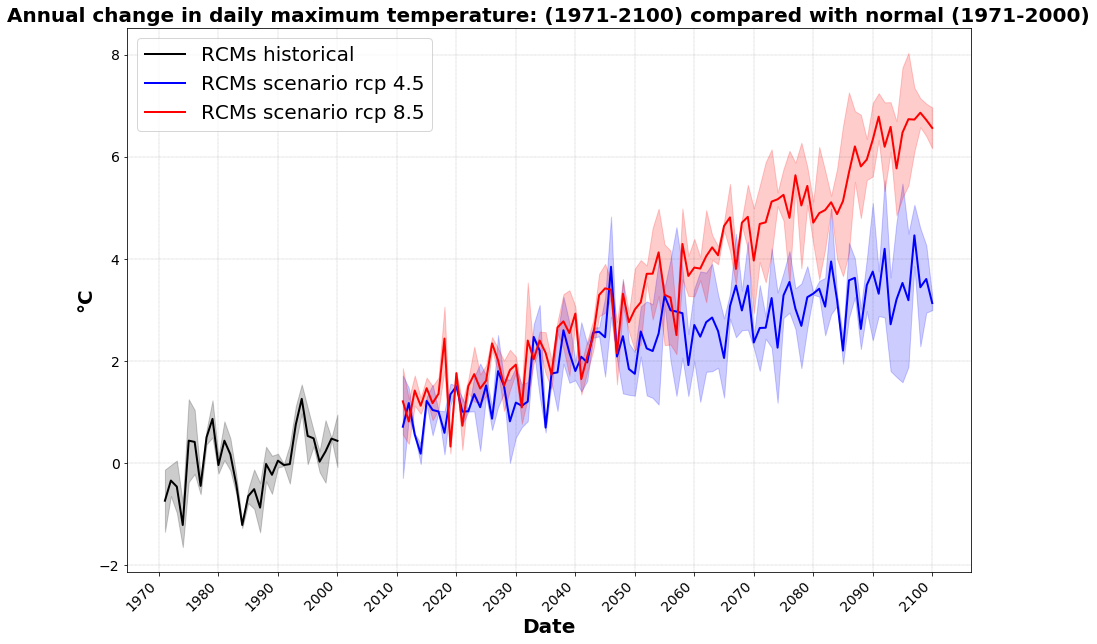

In [163]:
color = ['black','blue', 'red']
fig = plt.figure(figsize=(18, 10)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[6, 1]) 
gs.update( wspace=0.04)
ax1 = plt.subplot(gs[0])

plt.rcParams["figure.figsize"]=[16,9]       #  
plt.plot(result.index.year, result['mean_histo'][:],  label='RCMs historical', linewidth=2, c=color[0])
plt.plot(result.index.year, result['mean_rcp45'][:],  label='RCMs scenario rcp 4.5', linewidth=2, c=color[1])
plt.plot(result.index.year, result['mean_rcp85'][:],  label='RCMs scenario rcp 8.5', linewidth=2, c=color[2])

plt.fill_between(result.index.year,result['min_histo'],result['max_histo'], color = color[0], alpha=.2)
plt.fill_between(result.index.year,result['min_rcp45'],result['max_rcp45'], color =  color[1], alpha=.2)
plt.fill_between(result.index.year,result['min_rcp85'],result['max_rcp85'], color =  color[2], alpha=.2)
plt.legend(loc="upper left", markerscale=1., scatterpoints=1, fontsize=20)

plt.xticks(range(result.index.year[0]-1, result.index.year[-1]+1, 10), fontsize=14)
plt.yticks( fontsize=14)

ax1.grid(axis = "x", linestyle = "--", color='black', linewidth=0.25, alpha=0.5)
ax1.grid(axis = "y", linestyle = "--", color='black', linewidth=0.25, alpha=0.5)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Date', fontsize=20, color='black', weight='semibold')
plt.ylabel('°C', fontsize=20, color='black', weight='semibold')
plt.title('Annual change in daily maximum temperature: (1971-2100) compared with normal (1971-2000)', fontsize=20, color='black', weight='semibold')
 
ax1.set_facecolor('white')
plt.yticks( fontsize=14)
plt.show()  

Ajoutons à côté de notre graphique un boxplot sur tous les modèles pour la période 1971-2000 et 2071-2100 uniquement.

Nous allons extraire ces périodes de notre résultat matriciel = []

In [164]:
list_to_remove = ['min','max','mean']
df_histo = df_histo.drop(list_to_remove, axis=1)  
df_rcp45 = df_rcp45.drop(list_to_remove, axis=1)  
df_rcp85 = df_rcp85.drop(list_to_remove, axis=1) 
df_histo = df_histo.loc['1971' : '2010'].stack()
df_rcp45 = df_rcp45.loc['2071' : '2100'].stack()
df_rcp85 = df_rcp85.loc['2071' : '2100'].stack()

matrix_box = pd.DataFrame({'RCMs_histo': df_histo, 'RCMs_rcp45': df_rcp45,'RCMs_rcp85': df_rcp85},
        columns = ['RCMs_histo','RCMs_rcp45','RCMs_rcp85'])
matrix_box.head()

RCMs_histo  RCMs_rcp45  RCMs_rcp85
Date                                            
1971-01-01 0   -1.341567         NaN         NaN
           1   -0.124120         NaN         NaN
1972-01-01 0   -0.641267         NaN         NaN
           1   -0.035067         NaN         NaN
1973-01-01 0    0.054164         NaN         NaN

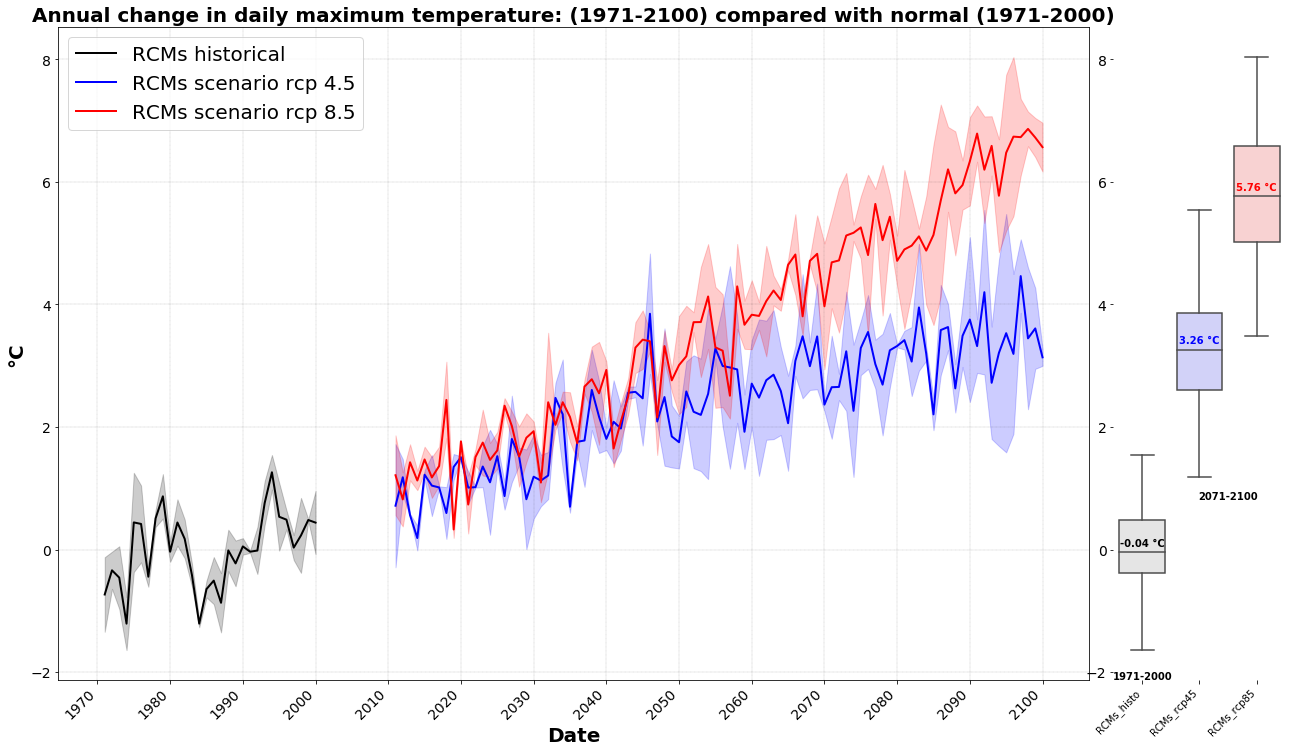

In [165]:
color = ['black','blue', 'red']
fig = plt.figure(figsize=(22, 12)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[6, 1]) 
gs.update( wspace=0.04)
ax1 = plt.subplot(gs[0])

plt.rcParams["figure.figsize"]=[16,9]       #  
plt.plot(result.index.year, result['mean_histo'][:],  label='RCMs historical', linewidth=2, c=color[0])
plt.plot(result.index.year, result['mean_rcp45'][:],  label='RCMs scenario rcp 4.5', linewidth=2, c=color[1])
plt.plot(result.index.year, result['mean_rcp85'][:],  label='RCMs scenario rcp 8.5', linewidth=2, c=color[2])

plt.fill_between(result.index.year,result['min_histo'],result['max_histo'], color = color[0], alpha=.2)
plt.fill_between(result.index.year,result['min_rcp45'],result['max_rcp45'], color =  color[1], alpha=.2)
plt.fill_between(result.index.year,result['min_rcp85'],result['max_rcp85'], color =  color[2], alpha=.2)
plt.legend(loc="upper left", markerscale=1., scatterpoints=1, fontsize=20)

#ax.set_xlim(result.index.year[0], result.index.year[-1])
plt.xticks(range(result.index.year[0]-1, result.index.year[-1]+1, 10), fontsize=14)
plt.yticks( fontsize=14)

ax1.grid(axis = "x", linestyle = "--", color='black', linewidth=0.25, alpha=0.5)
ax1.grid(axis = "y", linestyle = "--", color='black', linewidth=0.25, alpha=0.5)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Date', fontsize=20, color='black', weight='semibold')
plt.ylabel('°C', fontsize=20, color='black', weight='semibold')
plt.title('Annual change in daily maximum temperature: (1971-2100) compared with normal (1971-2000)', fontsize=20, color='black', weight='semibold')


my_pal = {"RCMs_histo": "grey", "RCMs_rcp45": "blue", "RCMs_rcp85":"red"}
ax2 = plt.subplot(gs[1])
#ax2 = matrix_box.boxplot(column=['RCMs_histo', 'RCMs_rcp45', 'RCMs_rcp85'])
ax2 = sns.boxplot(data=matrix_box, palette=my_pal)  
# Add transparency to colors
for patch in ax2.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .2))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
 
ax1.set_facecolor('white')
ax2.set_facecolor('white')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

medians = matrix_box.median().values
median_labels = [str(np.round(s, 2))+' °C' for s in medians]
pos = range(len(medians))
i=0
for tick,label in zip(pos,ax2.get_xticklabels()):
    ax2.text(pos[tick], medians[tick] + 0.1, median_labels[tick], 
            horizontalalignment='center', size='medium', color = color[i], weight='semibold')
    i+=1
x1, x2, x3 = 0, 1, 2
ax2.text(x1, matrix_box.min().min().round()-0.15 , "1971-2000", ha='center', va='bottom', size='medium', color='black', weight='semibold')   
ax2.text((x2+x3)*.5, matrix_box.min().median()-0.4 , "2071-2100", ha='center', va='bottom', size='medium', color='black', weight='semibold')
plt.yticks( fontsize=14)
    
plt.savefig('./figures/VI_YEAR_Mean_tasmax.png', bbox_inches='tight', format='png', dpi=1000)
plt.show()  